# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Araynah Dover</p>
# <p style="text-align: right;"> &#9989; doverara</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone git@github.com:doverara/cmse202-s25-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [65]:
# put your code here

df = pd.read_csv('/home/doverara/CMSECopy/notebooks/CMSE202/cmse202-s25-turnin/hw-04/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


How many patients are in this dataset? What are features of the patients?

<font size=6 color="#009600">&#9998;</font> There is are about `100,000` patients in this data frame.

The features consists of: `gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level` if label is `diabetes`

If label is `heart_disease` features are: `gender, age, hypertension, smoking_history, bmi, HbA1c_level, blood_glucose_level, diabetes`

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [83]:

# Replace those string values with numeric using replace
df["gender"] = df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})

df["smoking_history"] = df["smoking_history"].replace({'never': 0,'No Info': 1,'current': 2,'former': 3,
                                                       'ever': 4,'not current': 5})
df['diabetes'] = df['diabetes'].replace({1: 1, 0: -1})

### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [67]:
import numpy as np

class Perceptron():

    def __init__ (self, labeled_data, iters, learning_rate):        
        """
        Initialize the Perceptron.

        Parameters:
        labeled_data (array-like): Dataset where each row contains features and the last element is the label.
        iters (int): Number of training iterations.
        learning_rate (float): Step size for weight updates.
        """
        
        self.data = np.array(labeled_data)
        num_features = self.data.shape[1] - 1   
        self.weights = np.ones(num_features + 1)  
        self.iterations = iters
        self.learning_rate = learning_rate
        
    def predict(self, feature_set):
        """
        Predict the class label (+1 or -1) for a given feature set.

        Parameters:
        feature_set (array-like): Input features.

        Returns:
        int: +1 if positive side of hyperplane, else -1.
        """
        
        result = np.dot(feature_set, self.weights[1:]) + self.weights[0]
        return 1 if result > 0 else -1
    
    def fit(self):
        """
        Train the perceptron using the labeled data.
        Updates weights based on misclassifications over specified iterations.
        """

        for i in range(self.iterations):
            for row in self.data:
            
                features = row[:-1]
                label = row[-1]
            
                prediction = self.predict(features)
        
                update = self.learning_rate * (label - prediction)

                self.weights[1:] += update * features
    
                self.weights[0] += update

* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [68]:
X = df.drop(columns=['diabetes']).values

y = df['diabetes'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

labeled_train_data = np.hstack((X_train, y_train.reshape(-1, 1)))

p = Perceptron(labeled_data=labeled_train_data, iters=10, learning_rate=0.01)
p.fit()


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [69]:
test_predictions = np.array([p.predict(x) for x in X_test])

correct_predictions = (test_predictions == y_test).sum()
total_predictions = len(y_test)

test_accuracy = correct_predictions / total_predictions

print("Test Accuracy:",test_accuracy)

Test Accuracy: 0.9155


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [70]:
best_accuracy = 0
best_params = {'learning_rate': None, 'iterations': None}

# Small set of values to test
learning_rates = [0.01, 0.1, 0.5]
iterations_list = [5, 25, 50]

# for loop over learning rates
for lr in learning_rates:
    for iters in iterations_list:
        # Prepare training data
        labeled_train_data = np.hstack((X_train, y_train.reshape(-1, 1)))

        # Initialize and train perceptron
        p = Perceptron(labeled_data=labeled_train_data, iters=iters, learning_rate=lr)
        p.fit()

        # Predict and calculate accuracy
        test_predictions = np.array([p.predict(x) for x in X_test])
        accuracy = (test_predictions == y_test).sum() / len(y_test)

        # Check if this is the best so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'learning_rate': lr, 'iterations': iters}

        print(f"LR: {lr}, Iterations: {iters}, Accuracy: {accuracy:.4f}")


print("Accuracy:", best_accuracy)
print("Learning Rate:", best_params['learning_rate'])
print("Iterations:", best_params['iterations'])


LR: 0.01, Iterations: 5, Accuracy: 0.7399
LR: 0.01, Iterations: 25, Accuracy: 0.8943
LR: 0.01, Iterations: 50, Accuracy: 0.9479
LR: 0.1, Iterations: 5, Accuracy: 0.8344
LR: 0.1, Iterations: 25, Accuracy: 0.9347
LR: 0.1, Iterations: 50, Accuracy: 0.9363
LR: 0.5, Iterations: 5, Accuracy: 0.9136
LR: 0.5, Iterations: 25, Accuracy: 0.9319
LR: 0.5, Iterations: 50, Accuracy: 0.8584
Accuracy: 0.9478666666666666
Learning Rate: 0.01
Iterations: 50


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [72]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here

df2 = pd.read_csv("/home/doverara/CMSECopy/notebooks/CMSE202/cmse202-s25-turnin/hw-04/Telecust1.csv")
df2.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [75]:
df2["custcat"] = df2['custcat'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3})

In [74]:
df2.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,0
1,3,11,33,136,1,7,5,5,0,0,6,3
2,3,68,52,116,1,24,1,29,0,1,2,2
3,2,33,33,33,0,12,2,0,0,1,1,0
4,2,23,30,30,1,9,1,2,0,0,4,2


---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [76]:
class Perceptron():
    def __init__ (self, labeled_data, iters, learning_rate): 
        """
        Initialize the Perceptron.

        Parameters:
        labeled_data (array-like): Dataset with features and label per row.
        iters (int): Number of training iterations.
        learning_rate (float): Learning rate for weight updates.
        """
        
        self.data = np.array(labeled_data)
        num_features = self.data.shape[1] - 1   # Last column is label
        self.weights = np.ones(num_features + 1)  # +1 for bias
        self.iterations = iters
        self.learning_rate = learning_rate
        
    def predict(self, feature_set):
        """
        Predict binary class label (+1 or -1) for given features.

        Parameters:
        feature_set (array-like): Input features.

        Returns:
        int: +1 or -1 based on decision boundary.
        """
        
        result = np.dot(feature_set, self.weights[1:]) + self.weights[0]
        return 1 if result > 0 else -1

    def score(self, feature_set):
        """
        Compute raw score (signed distance from decision boundary) for given features.
        Useful for multi-class classification (One-vs-Rest).

        Parameters:
        feature_set (array-like): Input features.

        Returns:
        float: Signed score value.
        """
        
        return np.dot(feature_set, self.weights[1:]) + self.weights[0]
    
    def fit(self):
        """
        Train the perceptron on the provided labeled data.
        Adjusts weights to minimize classification errors.
        """
        
        for i in range(self.iterations):
            for row in self.data:
                features = row[:-1]
                label = row[-1]
                prediction = self.predict(features)
                update = self.learning_rate * (label - prediction)
                self.weights[1:] += update * features
                self.weights[0] += update


* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [77]:
# put your code here

X = df2.drop(columns=['custcat']).values   
y = df2['custcat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


label_sets_train = []
label_sets_test = []

num_classes = 5  

for class_label in range(num_classes):
    y_train_binary = np.where(y_train == class_label, 1, -1)
    y_test_binary = np.where(y_test == class_label, 1, -1)
    label_sets_train.append(y_train_binary)
    label_sets_test.append(y_test_binary)


* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [80]:
def predict_multiclass(perceptrons, X):
    predictions = []
    for x in X:
        scores = [p.score(x) for p in perceptrons]
        predicted_class = np.argmax(scores)
        predictions.append(predicted_class)
    return np.array(predictions)


num_classes = 5
perceptrons = []

# Train 5 Perceptrons 
for i in range(num_classes):
    
    # Create binary labels for class i
    y_train_binary = np.where(y_train == i, 1, -1)
    labeled_train_data = np.hstack((X_train, y_train_binary.reshape(-1, 1)))

    
    p = Perceptron(labeled_data=labeled_train_data, iters=100, learning_rate=0.01)
    p.fit()
    
    # Store trained perceptron
    perceptrons.append(p)

y_train_pred = predict_multiclass(perceptrons, X_train)
train_accuracy = (y_train_pred == y_train).sum() / len(y_train)

print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.29285714285714287


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [81]:
y_test_pred = predict_multiclass(perceptrons, X_test)


test_accuracy = (y_test_pred == y_test).sum() / len(y_test)

print("Test Accuracy :", test_accuracy)


Test Accuracy : 0.27666666666666667


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> Not so good we are getting an accuracy of 0.27-0.29


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [ ]:

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']}

X_subset = X_train[:200]
y_subset = y_train[:200]


grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_subset, y_subset)

print("Best Parameters ", grid_search.best_params_)

best_C = grid_search.best_params_['C']
best_kernel = grid_search.best_params_['kernel']

final_svm = SVC(C=best_C, kernel=best_kernel)
final_svm.fit(X_train, y_train)

Best Parameters  {'C': 10, 'kernel': 'linear'}


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

Final SVM Test Accuracy: 0.38666666666666666


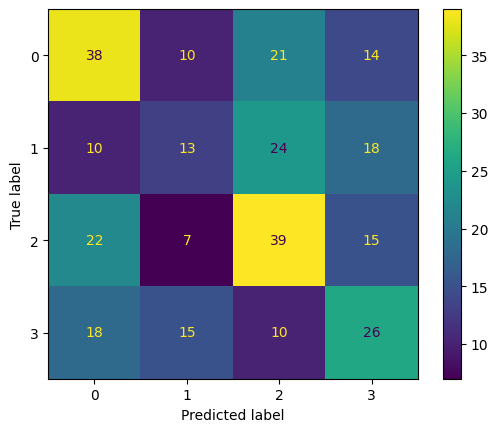

In [89]:
test_accuracy = final_svm.score(X_test, y_test)
print("Final SVM Test Accuracy:", test_accuracy)

y_pred = final_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> Yes, the SVM classifier performs better than the Perceptron.
The SVM achieved an accuracy of 38%, while the Perceptron. achieved 29%

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




In [92]:
accuracies = []
times = []

X_subset = X_train[:200]
y_subset = y_train[:200]

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'] 
}

In [95]:
for n_components in range(1, 12):
    start_time = time.time()
    
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_subset)
    
    grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=3)
    grid_search.fit(X_pca, y_subset)
    
    # best accuracy
    accuracies.append(grid_search.best_score_)
    
    # elapsed time
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)

    # Help received from ChatGPT (OpenAI) on April 22, 2025
    print(f"PCA Components: {n_components}, Accuracy: {grid_search.best_score_:.4f}, Time: {elapsed_time:.2f} sec")

PCA Components: 1, Accuracy: 0.3554, Time: 40.25 sec
PCA Components: 2, Accuracy: 0.3653, Time: 14.72 sec
PCA Components: 3, Accuracy: 0.3652, Time: 19.02 sec
PCA Components: 4, Accuracy: 0.3451, Time: 11.96 sec
PCA Components: 5, Accuracy: 0.3900, Time: 7.42 sec
PCA Components: 6, Accuracy: 0.3850, Time: 9.71 sec
PCA Components: 7, Accuracy: 0.4100, Time: 8.46 sec
PCA Components: 8, Accuracy: 0.3899, Time: 16.88 sec
PCA Components: 9, Accuracy: 0.3801, Time: 26.50 sec
PCA Components: 10, Accuracy: 0.3999, Time: 12.07 sec
PCA Components: 11, Accuracy: 0.3999, Time: 10.46 sec


**Source:** OpenAI. (2025). *ChatGPT* (GPT-4, April 22 version). Response to prompt: 
"how to output time best score in a for loop for components using formatting". 
Accessed April 22, 2025, from https://chat.openai.com

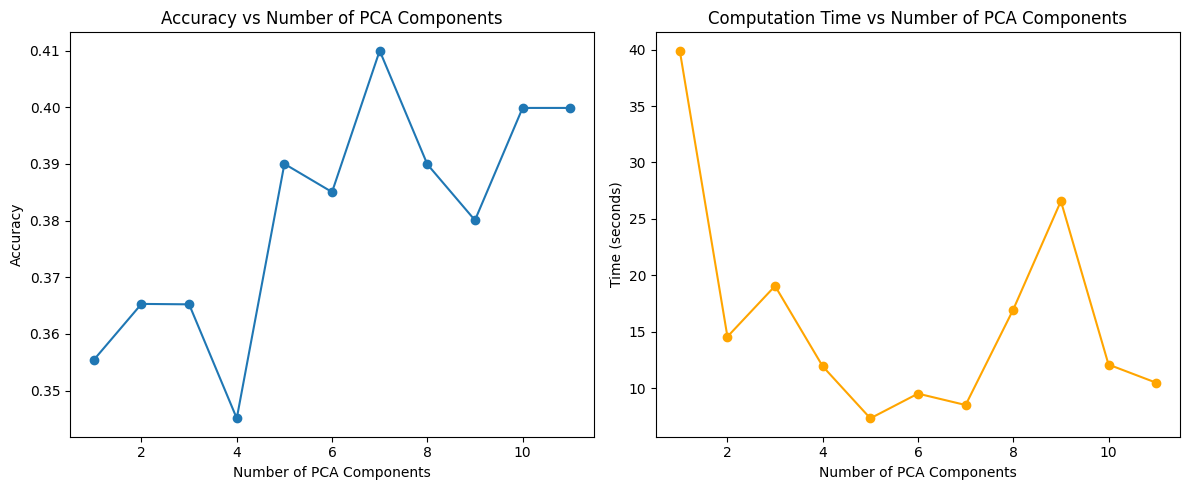

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot Accuracy
axs[0].plot(range(1, 12), accuracies, marker='o')
axs[0].set_title('Accuracy vs Number of PCA Components')
axs[0].set_xlabel('Number of PCA Components')
axs[0].set_ylabel('Accuracy')

# Plot Time
axs[1].plot(range(1, 12), times, marker='o', color='orange')
axs[1].set_title('Computation Time vs Number of PCA Components')
axs[1].set_xlabel('Number of PCA Components')
axs[1].set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> The overall accuracy of this SVM classifier is relatively low. The best accuracy achieved across all PCA component values was around 41% at 7 components. For a 5-class classification problem, where random guessing would give 20% accuracy, this is better than chance but still not ideal for use

The cause for the not ideas could lean on a couple factors such as information loss from PCA PCA reduces the dimensionality of the data by removing less important features based on variance. This could hurt performances. The nexr factor could be from kernel choice if the data is not linearly separable and a non optimal kernel is used, the SVM may struggle

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> The accuracy gradually increases from 1 to 7 PCA components.

the curves behave in that manner because the computation time decreases sharply from 1 to 5 components

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [96]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University